In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import uproot
import math
import csv
import random
import itertools
from scipy import stats
import dearpygui.dearpygui as dpg



In [2]:
c=0#random.choice((+1,-1))


if(c==0):
    #comparison

    partialTracks=np.load("injectedTrackscompare2.npy")
    injectedTracks=np.load("injectedTrackscompare2.npy")

if(c==+1):
    partialTracks=np.load('partialTrackTests5.npy')
    #injectedTracks=np.load('injectedTrackTests3.npy')
    injectedTracks=np.load('injectedTracks5.npy')
    #injectedTrack2=np.load('injectedTrack2.npy')


    #partialTracks=np.load('partialTracks.npy')
    #injectedTracks=np.load('injectedTracks.npy')

if(c==-1):
    partialTracks=np.load('partialTrackTestsPositive.npy')
    injectedTracks=np.load('injectedTrackTestsPositive.npy')

In [3]:
#injectedTracks=np.concatenate((injectedTrack1, injectedTrack2))
#injectedTracks = injectedTracks[~np.all(injectedTracks == 0, axis=1)]


In [4]:
partialTracks

array([[  1,  67],
       [  1, 101],
       [  2,  67],
       [  2, 102],
       [  5,  87],
       [  5, 112],
       [  6,  88],
       [  6, 113],
       [  3,  55],
       [  3,  86],
       [  4,  56],
       [  4,  87],
       [ 17,  27],
       [ 17,  75],
       [ 18,  27],
       [ 18,  75],
       [ 13,  46],
       [ 13,  79],
       [ 14,  45],
       [ 14,  79],
       [ 16,  28],
       [ 16,  69],
       [ 15,  28],
       [ 15,  69],
       [ 30,  24],
       [ 30,  82],
       [ 29,  24],
       [ 29,  82],
       [ 26,  20],
       [ 26,  97],
       [ 25,  21],
       [ 25,  97],
       [ 28,  12],
       [ 28,  81],
       [ 27,  12],
       [ 27,  81],
       [ 57,   3],
       [ 58,  29],
       [ 61,   5],
       [ 62,  35],
       [ 31,   9],
       [ 31,  13],
       [ 33,   9],
       [ 34,   6],
       [ 37,   3],
       [ 37,  11],
       [ 35,   9],
       [ 36,   5],
       [ 39,   1],
       [ 39,   2],
       [ 39,  12],
       [ 45,   2],
       [ 45,

In [5]:
#Testing the minimizer. Adding tracks to partial Tracks
testing = True

if(testing):
    #Gives a random number of partial tracks
    m=20#random.randrange(3,50)
    print(m)
    d=0
    for i in range(m):
        a=random.randrange(200)
        b=random.randrange(3)
        c=random.choice((1,3,5,13,15,17,19,21,23,25,27,29))
        partialTracks[200+d]=[c,a]
        print(partialTracks[200+d])
        partialTracks[200+d+1]=[c+1,a+b]
        print(partialTracks[200+d+1])
        d+=2
        print(d)


20
[ 1 63]
[ 2 64]
2
[15 46]
[16 48]
4
[ 29 135]
[ 30 136]
6
[ 25 120]
[ 26 121]
8
[15 95]
[16 95]
10
[15 23]
[16 25]
12
[ 21 140]
[ 22 142]
14
[  1 162]
[  2 162]
16
[ 23 128]
[ 24 130]
18
[  3 172]
[  4 172]
20
[19 97]
[20 98]
22
[27 54]
[28 55]
24
[ 19 170]
[ 20 170]
26
[  5 114]
[  6 116]
28
[ 5 64]
[ 6 64]
30
[19  6]
[20  6]
32
[ 17 140]
[ 18 141]
34
[25 28]
[26 28]
36
[  3 123]
[  4 124]
38
[25 19]
[26 21]
40


In [6]:
len(partialTracks)

500

In [7]:
#Parameters based on geometery of the detector. 
geomData = np.genfromtxt("ericsBasicGeo.txt.txt", dtype=float)
np.reshape(geomData, (30,27))
print(geomData)

[[ 1.00000e+00  5.94582e+02  2.01000e+02  6.35000e-01  6.35000e-01
   1.59000e-01  1.01600e+02 -7.94000e-01 -5.82710e+01  6.36490e+01
   9.71457e-01  1.21920e+02  2.68900e+00 -5.15940e+01  5.00060e+01
   2.37214e-01  8.76108e-02 -5.12162e+01 -5.80060e+01  5.95013e+02
  -2.96627e+01  1.21478e+02  1.31015e-01  6.54514e-01 -3.58501e-03
  -4.97447e-03 -4.14671e-02]
 [ 2.00000e+00  5.95218e+02  2.01000e+02  6.35000e-01  6.35000e-01
  -1.59000e-01  1.01600e+02 -7.94000e-01 -5.82710e+01  6.36490e+01
   9.71457e-01  1.21920e+02  2.68900e+00 -5.15940e+01  5.00060e+01
   2.37214e-01  8.76108e-02 -5.15017e+01 -5.79936e+01  5.95651e+02
  -2.96627e+01  1.21478e+02  1.31015e-01  6.54514e-01 -3.58501e-03
  -4.97447e-03  2.11140e-03]
 [ 3.00000e+00  6.17274e+02  1.60000e+02  6.35000e-01  6.35000e-01
   1.59000e-01  1.01600e+02 -5.52000e-01 -5.82170e+01  6.37030e+01
   1.00000e+00  1.21920e+02  2.74300e+00 -5.13520e+01  5.02480e+01
  -5.44461e-04  6.57774e-02 -5.11073e+01 -5.81882e+01  6.16904e+02
   6

In [8]:
#remove zeros
partialTracks = partialTracks[~np.all(partialTracks == 0, axis=1)]


In [9]:
#number of hits
nSt1=0
for i in range(7):
    print("detectorId =", i)
    print("hits on detector", np.count_nonzero(partialTracks[:,0]==i,axis=0))
    nSt1+=np.count_nonzero(partialTracks[:,0]==i,axis=0)
    print("total hits in station",nSt1)
    
nSt2=0
for i in range(13,19):
    print("detectorId =", i)
    print("hits on detector", np.count_nonzero(partialTracks[:,0]==i, axis=0))
    nSt2+=np.count_nonzero(partialTracks[:,0]==i,axis=0)
    print("total hits in station",nSt2)
    
nSt3m=0
for i in range(19,25):
    print("detectorId =", i)
    print("hits on detector", np.count_nonzero(partialTracks[:,0]==i, axis=0))
    nSt3m+=np.count_nonzero(partialTracks[:,0]==i,axis=0)
    print("total hits in station",nSt3m)

nSt3p=0
for i in range(25,31):
    print("detectorId =", i)
    print("hits on detector", np.count_nonzero(partialTracks[:,0]==i, axis=0))
    nSt3p+=np.count_nonzero(partialTracks[:,0]==i,axis=0)
    print("total hits in station",nSt3p)
nHits=nSt1+nSt2+nSt3m+nSt3p  
print("Hits in total:",nSt1+nSt2+nSt3m+nSt3p)
    


detectorId = 0
hits on detector 0
total hits in station 0
detectorId = 1
hits on detector 4
total hits in station 4
detectorId = 2
hits on detector 4
total hits in station 8
detectorId = 3
hits on detector 4
total hits in station 12
detectorId = 4
hits on detector 4
total hits in station 16
detectorId = 5
hits on detector 4
total hits in station 20
detectorId = 6
hits on detector 4
total hits in station 24
detectorId = 13
hits on detector 2
total hits in station 2
detectorId = 14
hits on detector 2
total hits in station 4
detectorId = 15
hits on detector 5
total hits in station 9
detectorId = 16
hits on detector 5
total hits in station 14
detectorId = 17
hits on detector 3
total hits in station 17
detectorId = 18
hits on detector 3
total hits in station 20
detectorId = 19
hits on detector 3
total hits in station 3
detectorId = 20
hits on detector 3
total hits in station 6
detectorId = 21
hits on detector 1
total hits in station 7
detectorId = 22
hits on detector 1
total hits in station

This is the detector before Cleaning.


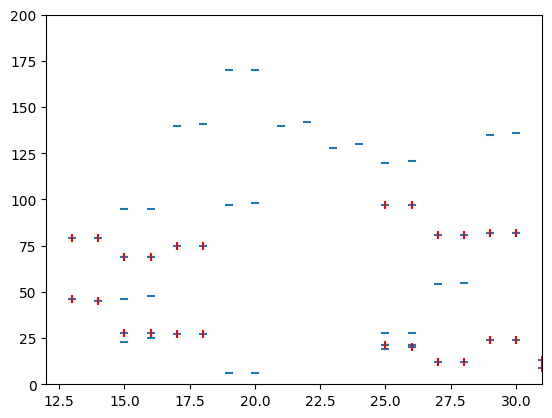

In [10]:
#plt.scatter(partialTracks[:,0],partialTracks[:,1],marker='_')
print("This is the detector before Cleaning.")
fig,ax=plt.subplots()
ax.scatter(partialTracks[:,0],partialTracks[:,1],marker='_')
ax.scatter(injectedTracks[:,0],injectedTracks[:,1],color='red',marker='|')
plt.xlim(12,31)
plt.ylim(0,200)
plt.show()

In [11]:
#Determines hit pairs through the whole detector

hitPairX=np.zeros((len(partialTracks)*6,2))
det=1
index=0
indexD=0
for k in range(15):
    detLeft=np.where(partialTracks[:,0]==det)
    detRight=np.where(partialTracks[:,0]==det+1)

    for i in range(len(detLeft[0])):
        Xp=partialTracks[detLeft[0][i]][1]
        for j in range(len(detRight[0])):
            X=partialTracks[detRight[0][j]][1]
            elemDist=abs(Xp-X)
            if(elemDist<=1):
                print("Hit Pair Found", elemDist, Xp, X)
                hitPairX[index,0]=partialTracks[detLeft[0][i],0]
                hitPairX[index,1]=partialTracks[detLeft[0][i],1]
                hitPairX[index+1,0]=partialTracks[detRight[0][j],0]
                hitPairX[index+1,1]=partialTracks[detRight[0][j],1]
                print("Det Id:",partialTracks[detLeft[0][i],0],partialTracks[detRight[0][j],0])
                print("Elem Id:",partialTracks[detLeft[0][i],1],partialTracks[detRight[0][j],1])
                print("Elem Diff", elemDist)
                print("index",index)
                index+=2   

            else:
                print("Not a Hit pair:",elemDist,Xp)

    det+=2
    print(det)
#_+_+_+_+_+_+_+_+_+_+_+



Hit Pair Found 0 67 67
Det Id: 1 2
Elem Id: 67 67
Elem Diff 0
index 0
Not a Hit pair: 35 67
Not a Hit pair: 3 67
Not a Hit pair: 95 67
Not a Hit pair: 34 101
Hit Pair Found 1 101 102
Det Id: 1 2
Elem Id: 101 102
Elem Diff 1
index 2
Not a Hit pair: 37 101
Not a Hit pair: 61 101
Not a Hit pair: 4 63
Not a Hit pair: 39 63
Hit Pair Found 1 63 64
Det Id: 1 2
Elem Id: 63 64
Elem Diff 1
index 4
Not a Hit pair: 99 63
Not a Hit pair: 95 162
Not a Hit pair: 60 162
Not a Hit pair: 98 162
Hit Pair Found 0 162 162
Det Id: 1 2
Elem Id: 162 162
Elem Diff 0
index 6
3
Hit Pair Found 1 55 56
Det Id: 3 4
Elem Id: 55 56
Elem Diff 1
index 8
Not a Hit pair: 32 55
Not a Hit pair: 117 55
Not a Hit pair: 69 55
Not a Hit pair: 30 86
Hit Pair Found 1 86 87
Det Id: 3 4
Elem Id: 86 87
Elem Diff 1
index 10
Not a Hit pair: 86 86
Not a Hit pair: 38 86
Not a Hit pair: 116 172
Not a Hit pair: 85 172
Hit Pair Found 0 172 172
Det Id: 3 4
Elem Id: 172 172
Elem Diff 0
index 12
Not a Hit pair: 48 172
Not a Hit pair: 67 123


(0.0, 200.0)

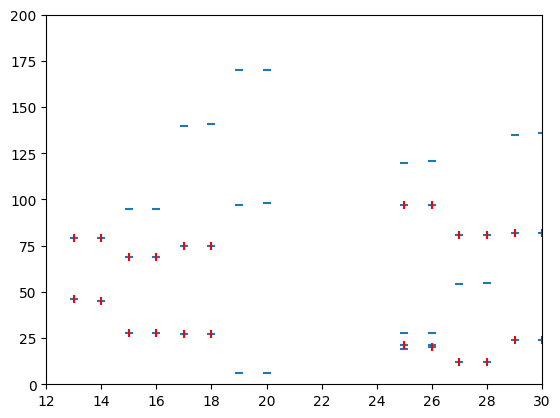

In [12]:
#plt.scatter(partialTracks[:,0],partialTracks[:,1],marker='_')
plt.scatter(hitPairX[:,0],hitPairX[:,1],marker='_')
plt.scatter(injectedTracks[:,0],injectedTracks[:,1],color='red',marker='|')
plt.xlim(12,30)
plt.ylim(0,200)

In [13]:
#math and values from paper


tx=.1
ty=.1

#cosine=math.cos(.244)
#sine=math.sin(.244)

#Station values

def Radius(Station):


    if(Station == 1):
        UID=4
        XID=2
        VID=0
        delta=5
        cosine=geomData[UID][10]
        sine=geomData[UID][15]

    elif(Station == 2):
        UID=16
        XID=15
        VID=12
        #V=14
        delta=5
        cosine=geomData[UID][10]
        sine=geomData[UID][15]

    elif(Station == 3):
        UID=23
        XID=21
        VID=19
        delta=15
        cosine=geomData[UID][10]
        sine=geomData[UID][15]

    elif(Station == 4):
        UID=29
        XID=27
        VID=25
        delta=15
        cosine=geomData[UID][10]
        sine=geomData[UID][15]


    URadius=abs((geomData[XID][11]*sine/2))+tx*abs(geomData[UID][1]-geomData[XID][1])*cosine+ty*abs(geomData[UID][1]-geomData[XID][1])*sine+2*geomData[UID][4]+delta
    
    
    
    VR1=geomData[UID][4]*2*cosine
    VR2=abs((geomData[UID][1]+geomData[VID][1]-2*geomData[XID][1])*cosine*tx)
    VR3=abs((geomData[VID][1]-geomData[UID][1])*sine*ty)
    VRadius=VR1+VR2+VR3+2*geomData[UID][4]
    
    
    #VRadius=tx*abs(geomData[UID][1]+geomData[VID][1]-2*geomData[XID][1])*cosine+ty*abs(geomData[UID][1]-geomData[VID][1])*sine+2*geomData[VID][4]+2*geomData[VID][4]*cosine
    print(URadius)
    print(VRadius)
    
    return(URadius,VRadius,VID,XID,UID, cosine, sine)

In [14]:
def getPosition(ID,Number, index):
    
    Position=[]
    
    #if(Number!=1):
       # Position=np.zeros((Number,2))
    #else:
     #   Position=np.zeros((1,2))
        
    for i in range(Number):
        #Position[i]=(hitPairX[index[0],1][i]-(geomData[ID][2]+1)/2)*geomData[ID][4]+geomData[ID][5]+geomData[ID][7]*geomData[ID][10]+geomData[ID][12]*geomData[ID][4]+geomData[ID][26],index[0][i]
        Position=np.append(Position,[((hitPairX[index[0],1][i]-(geomData[ID][2]+1)/2)*geomData[ID][4]+geomData[ID][5]+geomData[ID][7]*geomData[ID][10]+geomData[ID][12]*geomData[ID][15]+geomData[ID][26],index[0][i])])
        print("elemid",hitPairX[index[0],1][i])
    Position=np.reshape(Position, (Number,2))
    return(Position)

In [15]:
#NO LONGER NEEDED

def getCenter(XPosition,UPosition,cosine):
    

    print("ucenter, Xhit")
    ucenter=[]
    for i in range(len(XPosition)):
        ucenter=np.append(ucenter,[XPosition[i,0]*cosine,XPosition[i,1]],axis=0)

    ucenter=np.reshape(ucenter,(len(XPosition),2))
    print(ucenter)

    vcenter=[]
    index=0
    print("vcenter, xhit, uhit")
    #if(len(UPosition[0])>1):
    for i in range(len(ucenter)):
        for j in range(len(UPosition)):
            #vcenter[index]=2*ucenter[0][i]-UPosition[j,0],ucenter[1][i],UPosition[j,1]
            vcenter=np.append(vcenter,[2*ucenter[i,0]-UPosition[j,0],ucenter[i,1],UPosition[j,1]])
            index+=1

            
    print("this is ucenter:", ucenter)
    print("this is vcenter",vcenter)

    vcenter=np.reshape(vcenter,(index,3))
        

    return(ucenter,vcenter)

In [16]:
def plotcenter(VID, vcenter, UID, ucenter):
    vc=[]
    ID=VID
    for i in range(len(vcenter)):
        vc=np.append(vc,[vcenter[i]+((geomData[ID][2]+1)/2)*geomData[ID][4]-geomData[ID][5]-geomData[ID][7]*geomData[ID][10]-geomData[ID][12]*geomData[ID][4]-geomData[ID][26]])
   
    uc=[]
    ID=UID
    for i in range(len(ucenter)):
        uc=np.append(uc,[ucenter[i]+((geomData[ID][2]+1)/2)*geomData[ID][4]-geomData[ID][5]-geomData[ID][7]*geomData[ID][10]-geomData[ID][12]*geomData[ID][4]-geomData[ID][26]])

    return(vc,uc)

In [17]:
def getElemIDFromPos(ID,position):
    E=[]
    for i in range(len(position)):
        E=np.append(E,[((position[i]-(+geomData[ID][5]+geomData[ID][7]*geomData[ID][10]+geomData[ID][12]*geomData[ID][15]+geomData[ID][26]))/geomData[ID][4])+((geomData[ID][2]+1)/2)])
    return(E)

In [193]:
def compareArray(a,b):
    n = min(len(a), len(b))
    out_idx = np.flatnonzero(a[:n] == b[:n])
    out_val = a[out_idx]
    
    return(out_idx)

In [194]:
def getTrackletXU(Position,center,Radius,s,ID):
    
   # if(len(Position)>1 and len(center[0])>1):
    index=0
    TrackletsXU=[]
    
    for i in range(len(Position)):
        for j in range(len(center)):
            if(Position[i][0]>center[j][0]-Radius and Position[i][0]<center[j][0]+Radius):
                print("hit!")
                print(Position[i][0],center[j][0]-Radius,center[j][0]+Radius)
                print("This is the U hit!",Position[i][1])
                print("This is the X hit!",center[j][1])
               # TrackletsXU[index]=center[1][j],Position[i][1]
                index+=1
                
                TrackletsXU=np.append(TrackletsXU,[center[j][1],Position[i][1]])
                print(center)
               

            else:
                print("oops!")
                print(Position[i][0],center[j][0]-Radius,center[j][0]+Radius)
                
               
                print("This is the U hit!",Position[i][1])
                print("This is the X hit!",center[j][1])

  
        
    #TrackletsXU = np.unique(TrackletsXU)

    TrackletsXU=np.reshape(TrackletsXU,(-1,2))
    print("This is trackletXU", TrackletsXU)
    return(TrackletsXU)

In [195]:
def getTrackletV(Position,center,Radius,s,ID):
    
   # if(len(Position)>1):
      #  print(len(Position[0]))
    indexg=0
    indexb=0
    goodHitV=[]
    goodHitXU=[]
    badHitV=[]
    badHitXU=[]
    for i in range(len(Position)):
        for j in range(len(center)):
            if(Position[i][0]>center[j,0]-Radius and Position[i][0]<center[j,0]+Radius):
                print(Position[i][0],center[j,0]-Radius,center[j,0]+Radius,)
                print("hit!")
                #goodHitV[indexg]=Position[i][1]
                #goodHitXU[indexg]=center[j,1],center[j,2]
                indexg+=1
                goodHitV=np.append(goodHitV,[Position[i][1]]).T
                goodHitXU=np.append(goodHitXU,[center[j,1],center[j,2]])
                

            else:
                print("oops!")
                print(Position[i][0],center[j,0]-Radius,center[j,0]+Radius)
                
                #badHitXU[indexb]=center[j,1],center[j,2]
                #badHitV[indexb]=Position[i][1]
                indexb+=1
                badHitV=np.append(badHitV,[Position[i][1]]).T
                badHitXU=np.append(badHitXU,[center[j,1],center[j,2]])
    #else:
       # if(Position[0][0]>center[0]-Radius and Position[0][0]<center[0]+Radius):
           # print("hit!")
           # goodHitVXU[0]=Position[0][1],center[1],center[2]
           # print(Position[0][1],center[1],center[2])
        #else:
            #print("oops!")
           # badHitVXU[0]=Position[0][1],center[1],center[2]
            #print(Position[0][1],center[1],center[2])
            
    if(np.any(goodHitXU)):
        goodHitXU=np.reshape(goodHitXU,(int(-1*len(goodHitXU)/2),2))
        #goodHitXU=np.reshape(np.unique(goodHitXU),(-1,2)).T
    if(np.any(badHitXU)):
        badHitXU=np.reshape(badHitXU,(int(-1*len(badHitXU)/2),2))
    
    return(goodHitV,goodHitXU,badHitV,badHitXU)

In [196]:
def buildTracklet(TrackletsXU, goodHitXU, badHitXU,goodHitV,badHitV,s):
    flag=np.any(goodHitV)
    
    index=[]
    
    print("this is goodhitxu", badHitXU)
    if(flag==True):
        print("we are using the good v hits")
        #index=np.zeros(len(goodHitXU))

        for i in range(len(goodHitV)):
            for j in range(len(TrackletsXU)):
                    if(goodHitXU[i,0]==TrackletsXU[j,0] and goodHitXU[i,1]==TrackletsXU[j,1]):
                        print("goodHit found!",goodHitXU[j])
                        index=np.append(index,i)
        index=np.unique(index)                
        print("index -> ",index)

            
        Tracklets=np.zeros((len(index),6,2))
        
        if(s==2):

            for l in range(len(index)):    
                Tracklets[l][0]=hitPairX[goodHitV[int(index[l])].astype(int)]
                Tracklets[l][1]=hitPairX[goodHitV[int(index[l])].astype(int)+1]

                Tracklets[l][2]=hitPairX[goodHitXU[int(index[l])].astype(int)-1][0]
                Tracklets[l][3]=hitPairX[goodHitXU[int(index[l])].astype(int)][0]

                Tracklets[l][4]=hitPairX[goodHitXU[int(index[l])].astype(int)][1]
                Tracklets[l][5]=hitPairX[goodHitXU[int(index[l])].astype(int)+1][1]
                
        if(s==3 or s==4):
            for l in range(len(index)):    

                Tracklets[l][0]=hitPairX[goodHitV[int(index[l])].astype(int)-1]
                Tracklets[l][1]=hitPairX[goodHitV[int(index[l])].astype(int)]

                Tracklets[l][2]=hitPairX[goodHitXU[int(index[l])].astype(int)-1][0]
                Tracklets[l][3]=hitPairX[goodHitXU[int(index[l])].astype(int)][0]

                Tracklets[l][4]=hitPairX[goodHitXU[int(index[l])].astype(int)-1][1]
                Tracklets[l][5]=hitPairX[goodHitXU[int(index[l])].astype(int)][1]
        
    
    
    
    
    if(flag==False):
        print("oh darn, no good hits in v. Empty Station?")
        
        for j in range(len(badHitXU)):
            for k in range(len(TrackletsXU)):
                if(badHitXU[j,0]==TrackletsXU[k,0] and badHitXU[j,1]==TrackletsXU[k,1]):
                    print("Hit found!",badHitXU[j])
                    index=np.append(index,j)

        
        Tracklets=np.zeros((len(index),6,2))
        
        if(s==2):

            for l in range(len(index)):    
                Tracklets[l][0]=0
                Tracklets[l][1]=0

                Tracklets[l][2]=hitPairX[badHitXU[int(index[l])].astype(int)-1][0]
                Tracklets[l][3]=hitPairX[badHitXU[int(index[l])].astype(int)][0]

                Tracklets[l][4]=hitPairX[badHitXU[int(index[l])].astype(int)][1]
                Tracklets[l][5]=hitPairX[badHitXU[int(index[l])].astype(int)+1][1]
                
        if(s==3 or s==4):
            
           
            for l in range(len(index)):    

                Tracklets[l][0]=0
                Tracklets[l][1]=0

                Tracklets[l][2]=hitPairX[badHitXU[int(index[l])].astype(int)-1][0]
                Tracklets[l][3]=hitPairX[badHitXU[int(index[l])].astype(int)][0]

                Tracklets[l][4]=hitPairX[badHitXU[int(index[l])].astype(int)-1][1]
                Tracklets[l][5]=hitPairX[badHitXU[int(index[l])].astype(int)][1]
        
    
        
    

    
    
    
    
    

    return(Tracklets)

In [197]:
#Setting what the planes are based off the station
print("This is the start of the loop")
#s=4
#file1 = open("comparelog.txt","w")

TrackletSt2=[]
TrackletSt3pm=[]
for s in range(4,5):
    URadius,VRadius,VID,XID,UID, cosine, sine=Radius(s)
    #Shows what station:
    print("we are in Station:", s)
    if(s==2):
        V=geomData[VID][0]
        X=V+3
        U=V+4
        
    
    else:
        
        V=geomData[VID][0]
        X=V+2
        U=V+4
    print(URadius,VRadius,VID,XID,UID,V,X,U)


   
    
    print("This is V:", V)
    print("This is X",X)
    print("This is U", U)

    i=0
    j=0
    k=0

    indexU=np.where(hitPairX[:,0]==U)
    indexV=np.where(hitPairX[:,0]==V)
    indexX=np.where(hitPairX[:,0]==X)
    print("IndexX",indexX)

    NumberX=np.count_nonzero(indexX)
    print("NumberX",NumberX)
    NumberU=np.count_nonzero(indexU)
    print("NumberU",NumberU)

    NumberV=np.count_nonzero(indexV)
    print("NumberV",NumberV)
    
    if(NumberU == 0 or NumberV == 0 or NumberX == 0):
        print("empty station")
        if(NumberU>0):
            for i in range(NumberU):
                hitPairX[indexU[0][i]]=[0,0]
                hitPairX[indexU[0][i]-1]=[0,0]
        if(NumberV>0):
            for i in range(NumberV):
                hitPairX[indexV[0][i]]=[0,0]
                hitPairX[indexV[0][i]-1]=[0,0]
        if(NumberX>0):
            for i in range(NumberX):
                hitPairX[indexX[0][i]]=[0,0]
                hitPairX[indexX[0][i]-1]=[0,0]
           
    xhit=np.zeros(NumberX)       

    XPosition=getPosition(XID,NumberX,indexX)
    UPosition=getPosition(UID,NumberU,indexU)
    VPosition=getPosition(VID,NumberV,indexV)
    
    




    
    print("ucenter, Xhit")
    vcenter=[]

    #ucenter=np.append(ucenter,[XPosition[:,0]*cosine,XPosition[:,1]],axis=0)

    ucenter=np.zeros((len(XPosition),2))
    for i in range(len(XPosition)):
        ucenter[i,0]=XPosition[i,0]*cosine
        ucenter[i,1]=XPosition[i,1]

    print(ucenter)    
        

    #ucenter=np.reshape(ucenter,(len(XPosition),2))



    #ucenter=getCenter(XPosition,UPosition,cosine)
    print("This is ucenter",ucenter)

    print("Lets form tracklets!")
    print("forming Tracklet XU")
    TrackletsXU=getTrackletXU(UPosition,ucenter,URadius,s,UID)
    print("getting vcenter")


    if(TrackletsXU.any()==True):

        ucent=[]
        comparedindex=compareArray(ucenter[:,1],TrackletsXU[:,0])
        for k in range(len(comparedindex)):
            ucent=np.append(ucent,[ucenter[comparedindex[k]]])
        ucenter=np.reshape(ucent,(-1,2))

        #ucenter=np.reshape(recenter,(-1,2))
        print("recentered Ucenter", ucenter)

        upos=[]
        comparedindex=compareArray(UPosition[:,1],TrackletsXU[:,1])
        for k in range(len(comparedindex)):
            upos=np.append(upos,[UPosition[comparedindex[k]]])
        upos=np.reshape(upos,(-1,2))


        for k in range(len(upos)):
            vcenter=np.append(vcenter,[2*ucenter[k,0]-upos[k,0],ucenter[k,1],upos[k,1]], axis = None)



    print("this is vcenter",vcenter)

    vcenter=np.reshape(vcenter,(-1,3))

    
    
        
    #vcenter[0,0]=UPosition[0,0]
    
    print("geeting good hits in v plane based off XU")
    goodHitV,goodHitXU,badHitV,badHitXU=getTrackletV(VPosition,vcenter,VRadius,s,VID)
    
    print("connecting good V hits to good XU hits")
    Tracklets=buildTracklet(TrackletsXU, goodHitXU, badHitXU,goodHitV,badHitV,s)
    
    print("Here are the tracks for station:",s)
    print(Tracklets)    
        
    
    if(s==2):
        print("saving Tracklets 2")

        TrackletSt2=np.append(TrackletSt2,Tracklets)
        
    if(s==3 or s==4):
        print("saving Tracklets 3pm")
        TrackletSt3pm=np.append(TrackletSt3pm,Tracklets)
    




This is the start of the loop
39.6558675
8.221731413999999
we are in Station: 4
39.6558675 8.221731413999999 25 27 29 26.0 28.0 30.0
This is V: 26.0
This is X 28.0
This is U 30.0
IndexX (array([59, 61, 63], dtype=int64),)
NumberX 3
NumberU 3
NumberV 6
elemid 12.0
elemid 81.0
elemid 55.0
elemid 24.0
elemid 82.0
elemid 136.0
elemid 20.0
elemid 21.0
elemid 97.0
elemid 121.0
elemid 28.0
elemid 20.0
ucenter, Xhit
[[-92.1501813  59.       ]
 [ 41.6997447  61.       ]
 [ -8.7364593  63.       ]]
This is ucenter [[-92.1501813  59.       ]
 [ 41.6997447  61.       ]
 [ -8.7364593  63.       ]]
Lets form tracklets!
forming Tracklet XU
hit!
-69.42148685586 -131.8060487963896 -52.494313796389605
This is the U hit! 65.0
This is the X hit! 59.0
[[-92.1501813  59.       ]
 [ 41.6997447  61.       ]
 [ -8.7364593  63.       ]]
oops!
-69.42148685586 2.0438772036103927 81.35561220361039
This is the U hit! 65.0
This is the X hit! 61.0
oops!
-69.42148685586 -48.392326796389604 30.919408203610395
This is t

In [198]:
#reshaping to organize properly
TrackletSt2=np.reshape(TrackletSt2,(-1,6,2))
TrackletSt3pm=np.reshape(TrackletSt3pm,(-1,6,2))

In [199]:
goodHitXU

array([[59., 65.],
       [59., 65.],
       [61., 67.],
       [59., 65.]])

plotting Station 2


(0.0, 200.0)

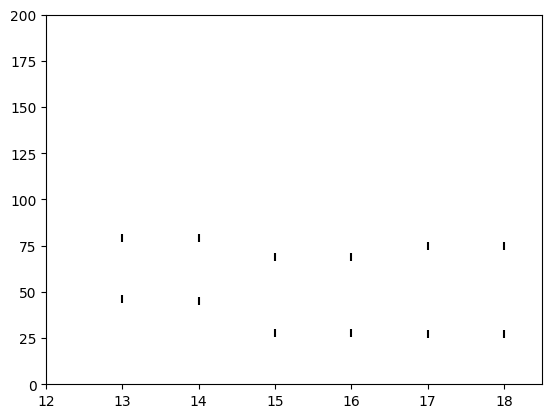

In [200]:
print("plotting Station 2")

cmap = plt.cm.get_cmap("plasma")
marker = itertools.cycle((',', '+', '.', 'o', '*','_')) 

for i in range(len(TrackletSt2)):

    plt.scatter(TrackletSt2[i][:,0],TrackletSt2[i][:,1],marker=next(marker))


plt.scatter(injectedTracks[:,0],injectedTracks[:,1],color='k',marker='|')

plt.xlim(12,18.5)
plt.ylim(0,200)





In [201]:

# string to search in file
with open(r'comparison/log.txt', 'r') as fp, open('Kinfo.txt','w') as fk:
    # read all lines using readline()
    lines = fp.readlines()
    for row in lines:
        # check if string present on a current line
        word = 'jindex'
        #print(row.find(word))
        # find() method returns -1 if the value is not found,
        # if found it returns index of the first occurrence of the substring
        if row.find(word) != -1:
            print('string exists in file')
            print('line Number:', lines.index(row))
            fk.write(row)

string exists in file
line Number: 1050
string exists in file
line Number: 1051
string exists in file
line Number: 1052
string exists in file
line Number: 1053
string exists in file
line Number: 1054
string exists in file
line Number: 1055
string exists in file
line Number: 1056
string exists in file
line Number: 1057
string exists in file
line Number: 1058
string exists in file
line Number: 1059
string exists in file
line Number: 1060
string exists in file
line Number: 1061
string exists in file
line Number: 1062
string exists in file
line Number: 1063
string exists in file
line Number: 1064
string exists in file
line Number: 1065
string exists in file
line Number: 1066
string exists in file
line Number: 1067
string exists in file
line Number: 1137
string exists in file
line Number: 1138
string exists in file
line Number: 1139
string exists in file
line Number: 1140
string exists in file
line Number: 1141
string exists in file
line Number: 1142
string exists in file
line Number: 1143


In [202]:
ktrackerData = np.genfromtxt('Kinfo.txt', delimiter=',')
ktrackerData = ktrackerData[~np.isnan(ktrackerData)]
ktrackerData = np.reshape(ktrackerData,(-1,9))
print(ktrackerData)

[[ 0.0000e+00 -6.0023e+01  0.0000e+00  0.0000e+00  0.0000e+00  2.8000e+01
   1.6000e+01  2.0000e+00  1.0000e+00]
 [ 1.0000e+00 -7.6445e+01 -1.0414e+02 -1.2184e+01 -5.8159e+01  2.7000e+01
   1.8000e+01  2.0000e+00  1.0000e+00]
 [ 2.0000e+00 -4.0647e+01 -4.9105e+01 -3.0643e+01 -3.9874e+01  4.5000e+01
   1.4000e+01  2.0000e+00  1.0000e+00]
 [ 0.0000e+00  2.5380e+01  0.0000e+00  0.0000e+00  0.0000e+00  6.9000e+01
   1.6000e+01  2.0000e+00  1.0000e+00]
 [ 1.0000e+00  2.0563e+01 -2.1384e+01  7.0567e+01  2.4591e+01  7.5000e+01
   1.8000e+01  2.0000e+00  1.0000e+00]
 [ 2.0000e+00  2.7057e+01  1.9388e+01  3.7850e+01  2.8619e+01  7.9000e+01
   1.4000e+01  2.0000e+00  1.0000e+00]
 [ 0.0000e+00 -9.5510e+01  0.0000e+00  0.0000e+00  0.0000e+00  1.2000e+01
   2.8000e+01  4.0000e+00  1.0000e+00]
 [ 1.0000e+00 -6.9925e+01 -1.3290e+02 -5.2375e+01 -9.2638e+01  2.4000e+01
   3.0000e+01  4.0000e+00  1.0000e+00]
 [ 2.0000e+00 -1.1597e+02 -1.2360e+02 -1.0711e+02 -1.1535e+02  2.0000e+01
   2.6000e+01  4.0000e

In [203]:
ktdata=[]
for i in range(len(ktrackerData)):
    if(ktrackerData[i,8]==1):
        ktdata=np.append(ktdata,ktrackerData[i])

In [204]:
ktrackerData = np.reshape(ktdata,(-1,9))

In [205]:
ktrackerData[9,5]

81.0

In [206]:
TrackletsXU

array([[59., 65.],
       [61., 67.]])

In [207]:
kvcenter=[]
kucenter=[]
kumax=[]
kumin=[]
kvmax=[]
kvmin=[]
kupos=[]
kxpos=[]
kvpos=[]

for i in range(len(ktrackerData)):
    if(ktrackerData[i,0]==0.0):
        kxpos=np.append(kxpos,[ktrackerData[i,1],ktrackerData[i,7]])
    
    if(ktrackerData[i,0]==1.0):
        kupos=np.append(kupos,[ktrackerData[i,1],ktrackerData[i,7]])
        kumin=np.append(kumin,[ktrackerData[i,2],ktrackerData[i,7]])
        kumax=np.append(kumax,[ktrackerData[i,3],ktrackerData[i,7]])
        kucenter=np.append(kucenter,[ktrackerData[i,4],ktrackerData[i,7]])
        
    if(ktrackerData[i,0]==2.0):
        kvpos=np.append(kvpos,[ktrackerData[i,1],ktrackerData[i,7]])
        kvmin=np.append(kvmin,[ktrackerData[i,2],ktrackerData[i,7]])
        kvmax=np.append(kvmax,[ktrackerData[i,3],ktrackerData[i,7]])
        kvcenter=np.append(kvcenter,[ktrackerData[i,4],ktrackerData[i,7]])
        
kumax=np.reshape(kumax,(-1,2))
kumin=np.reshape(kumin,(-1,2))
kvmax=np.reshape(kvmax,(-1,2))
kvmin=np.reshape(kvmin,(-1,2))
kucenter=np.reshape(kucenter,(-1,2))
kvcenter=np.reshape(kvcenter,(-1,2))
kxpos=np.reshape(kxpos,(-1,2))
kupos=np.reshape(kupos,(-1,2))
kvpos=np.reshape(kvpos,(-1,2))





In [208]:

kumax=np.delete(kumax,np.where(kumax[:,1]!=s),0)
kumin=np.delete(kumin,np.where(kumin[:,1]!=s),0)
kvmax=np.delete(kvmax,np.where(kvmax[:,1]!=s),0)
kvmin=np.delete(kvmin,np.where(kvmin[:,1]!=s),0)
kucenter=np.delete(kucenter,np.where(kucenter[:,1]!=s),0)
kvcenter=np.delete(kvcenter,np.where(kvcenter[:,1]!=s),0)

kxpos=np.delete(kxpos,np.where(kxpos[:,1]!=s),0)
kupos=np.delete(kupos,np.where(kupos[:,1]!=s),0)
kvpos=np.delete(kvpos,np.where(kvpos[:,1]!=s),0)




In [209]:
def getRatio(ktracker,python):
    ratio=ktracker/python
    
    plt.hlines(y=ratio[0],xmin=0,xmax=1,color='black',linestyle='-')
    plt.hlines(y=ratio[1],xmin=0,xmax=1,color='black',linestyle='-')
    plt.hlines(y=1,xmin=0,xmax=1,color='red',linestyle='-')

    return(ratio)

array([1.00410105, 0.98718186])

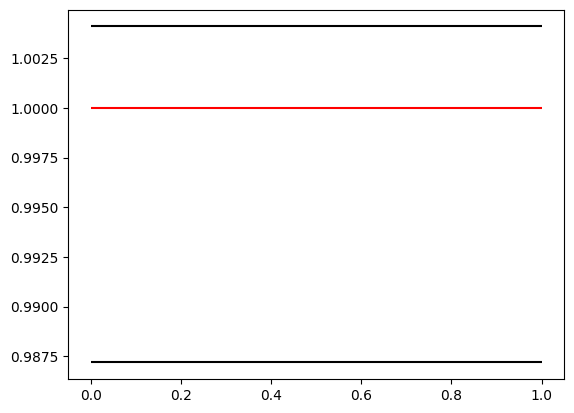

In [210]:
vMin=vcenter-VRadius
vMax=vcenter+VRadius

getRatio(kvcenter[:,0],vcenter[:,0])

plotting Station 3pm
lets get plottable centers


(0.0, 200.0)

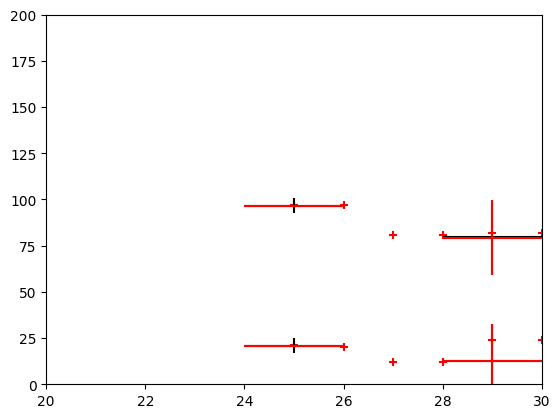

In [211]:
print("plotting Station 3pm")

cmap = plt.cm.get_cmap("plasma")
marker = itertools.cycle((',', '+', '.', 'o', '*','_')) 

#for i in range(len(TrackletSt3pm)):

    #plt.scatter(TrackletSt3pm[i][:,0],TrackletSt3pm[i][:,1],marker=next(marker))

#Python

print("lets get plottable centers")
vc=getElemIDFromPos(VID,vcenter[:,0])
uc=getElemIDFromPos(UID,ucenter[:,0])

for i in range(len(vc)):    
    plt.hlines(y=vc[i],xmin=(VID-1),xmax=(VID+1),color='black',linestyle='-')
for i in range(len(uc)):    
    plt.hlines(y=uc[i],xmin=(UID-1),xmax=(UID+1),color='black',linestyle='-')
    
vmin=getElemIDFromPos(VID,vcenter[:,0]-VRadius)
vmax=getElemIDFromPos(VID,vcenter[:,0]+VRadius)

umin=getElemIDFromPos(UID,ucenter[:,0]-URadius)
umax=getElemIDFromPos(UID,ucenter[:,0]+URadius)
for i in range(len(vmin)):
    plt.vlines(x = VID, ymin = vmin[i], ymax = vmax[i], colors = 'black', label ='V window')
    
for i in range(len(umin)):
    plt.vlines(x = UID, ymin = umin[i], ymax = umax[i], colors = 'black', label ='U window')

#ktracker


kvc=getElemIDFromPos(VID,kvcenter[:,0])
kuc=getElemIDFromPos(UID,kucenter[:,0])

kvMin=getElemIDFromPos(VID,kvmin[:,0])
kvMax=getElemIDFromPos(VID,kvmax[:,0])

kuMin=getElemIDFromPos(UID,kumin[:,0])
kuMax=getElemIDFromPos(UID,kumax[:,0])

for i in range(len(kvc)):
    plt.hlines(y=kvc[i],xmin=VID-1,xmax=VID+1,color='red',linestyle='-')
for i in range(len(kuc)):
    plt.hlines(y=kuc[i],xmin=UID-1,xmax=UID+1,color='red',linestyle='-')
#for i in range(len(kvMin)):
    #plt.vlines(x = VID, ymin = kvMin[i], ymax = kvMax[i], colors = 'red', label ='U window')

for i in range(len(kuMin)):
    plt.vlines(x = UID, ymin = kuMin[i], ymax = kuMax[i], colors = 'red', label ='U window')
plt.scatter(injectedTracks[:,0],injectedTracks[:,1],color='red',marker='+')

plt.xlim(20,30)
plt.ylim(0,200)

In [212]:
Tracklets

array([[[25., 21.],
        [26., 20.],
        [27., 12.],
        [28., 12.],
        [29., 24.],
        [30., 24.]],

       [[25., 21.],
        [26., 21.],
        [27., 12.],
        [28., 12.],
        [29., 24.],
        [30., 24.]],

       [[25., 97.],
        [26., 97.],
        [27., 81.],
        [28., 81.],
        [29., 82.],
        [30., 82.]],

       [[25., 19.],
        [26., 20.],
        [27., 12.],
        [28., 12.],
        [29., 24.],
        [30., 24.]]])

In [216]:
TrackletSt3pm

array([[[25., 21.],
        [26., 20.],
        [27., 12.],
        [28., 12.],
        [29., 24.],
        [30., 24.]],

       [[25., 21.],
        [26., 21.],
        [27., 12.],
        [28., 12.],
        [29., 24.],
        [30., 24.]],

       [[25., 97.],
        [26., 97.],
        [27., 81.],
        [28., 81.],
        [29., 82.],
        [30., 82.]],

       [[25., 19.],
        [26., 20.],
        [27., 12.],
        [28., 12.],
        [29., 24.],
        [30., 24.]]])

(0.0, 200.0)

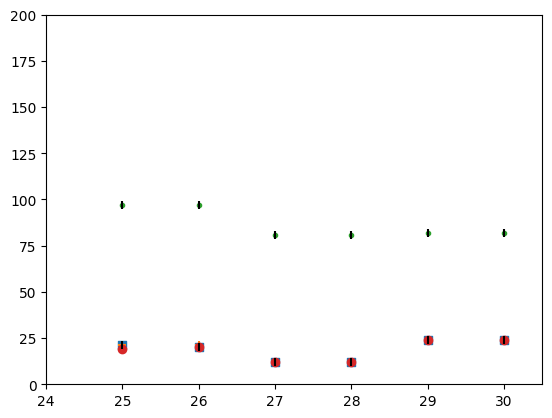

In [215]:
cmap = plt.cm.get_cmap("plasma")
marker = itertools.cycle((',', '+', '.', 'o', '*','_')) 

for i in range(len(TrackletSt2)):

    plt.scatter(TrackletSt2[i][:,0],TrackletSt2[i][:,1],marker=next(marker))
    
for i in range(len(TrackletSt3pm)):

    plt.scatter(TrackletSt3pm[i][:,0],TrackletSt3pm[i][:,1],marker=next(marker))
    
plt.scatter(injectedTracks[:,0],injectedTracks[:,1],color='k',marker='|')

plt.xlim(24,30.5)
plt.ylim(0,200)


In [43]:
for i in range(18,30):
    print(geomData[i][0])
    print(geomData[i][5])

19.0
0.5
20.0
-0.5
21.0
0.5
22.0
-0.5
23.0
0.5
24.0
-0.5
25.0
-0.5
26.0
0.5
27.0
-0.5
28.0
0.5
29.0
-0.5
30.0
0.5


In [45]:
print(((geomData[XID][2]+1)/2)*geomData[XID][4])
print(geomData[XID][5])
print(geomData[XID][7],geomData[XID][10])
print(geomData[XID][12],geomData[XID][15])
print(geomData[XID][26])
 

117.68950000000001
0.521
-0.816646 0.999996
-0.0619792 0.00272054
0.172412


In [46]:
(((geomData[XID][2]+1)/2)*geomData[XID][4])+geomData[XID][5]+geomData[XID][7]*geomData[XID][10]+geomData[XID][12]*geomData[XID][15]+geomData[XID][26]

117.56610064969124